Handwritten Digit Recognition
- Description: Implement a simple model using the MNIST dataset to classify handwritten digits. Evaluate performance using metrics like accuracy and F1 score.

Kaggle source: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

In [3]:
#Imported Libraries
from tensorflow.keras.datasets import mnist #imports dataset

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# One-hot encode labels (0–9)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
# Build the model
model = Sequential([
    Input(shape=(28, 28)),          # Define input shape here
    Flatten(),                      # Convert 2D (28x28) images to 1D (784)
    Dense(64, activation='relu'),   # Hidden layer , using 64 units to create fully connected layer
    Dense(10, activation='softmax') # Output layer, 10 clases for each of the digits
])


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8437 - loss: 0.5580 - val_accuracy: 0.9485 - val_loss: 0.1823
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9511 - loss: 0.1675 - val_accuracy: 0.9619 - val_loss: 0.1361
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9678 - loss: 0.1139 - val_accuracy: 0.9650 - val_loss: 0.1148
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9743 - loss: 0.0894 - val_accuracy: 0.9670 - val_loss: 0.1057
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9792 - loss: 0.0709 - val_accuracy: 0.9686 - val_loss: 0.1023


In [9]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1169
Test Accuracy: 0.9687


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



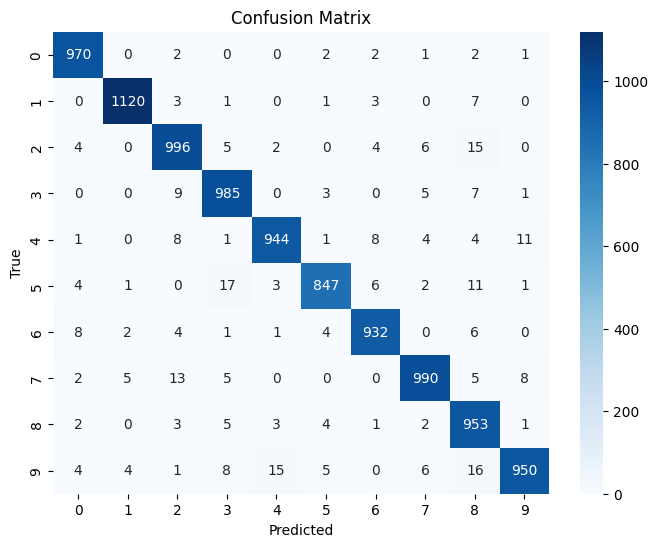

In [10]:
# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=-1)

# F1 Score and more
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()